In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [8]:
data = pd.read_csv("diabetes.csv") 

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [11]:
X = data.drop(columns=["Outcome"])
y = data["Outcome"]

In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
def minkowski_distance(a, b, p=2):
    dim = len(a)
    distance = 0 # initial dist
    for d in range(dim):
        distance += abs(a[d] - b[d])**p    
    distance = distance**(1/p)
    
    return distance
minkowski_distance(a=X.iloc[0], b=X.iloc[1], p=1) #Manhattan dist

106.276

In [17]:
def minkowski_distance(a, b, p=2):
    dim = len(a)
    distance = 0 # initial dist
    for d in range(dim):
        distance += abs(a[d] - b[d])**p    
    distance = distance**(1/p)
    
    return distance
minkowski_distance(a=X.iloc[0], b=X.iloc[1], p=2) #Euclidean dist

66.90348403483932

In [18]:
test_pt = [148, 85, 103,71, 44]
distances = []

for i in X.index:
    
    distances.append(minkowski_distance(test_pt, X.iloc[i]))
    
df_dists = pd.DataFrame(data=distances, index=X.index, columns=['dist'])
df_dists.head()

,dist
0,168.303298
1,163.334014
2,194.170029
3,166.727322
4,212.718123


In [19]:
df_nn = df_dists.sort_values(by=['dist'], axis=0)[:3] #using 3 nearest neighbour
df_nn

,dist
358,142.853071
92,146.625373
625,147.180162


In [20]:
from collections import Counter
counter = Counter(y[df_nn.index])
counter.most_common()[0][0]

0

In [21]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    
    from collections import Counter
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
            
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        counter = Counter(y_train[df_nn.index])

        prediction = counter.most_common()[0][0]
        
        y_hat_test.append(prediction)
        
    return y_hat_test

y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=3, p=1)

print(y_hat_test)


[0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]


In [22]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_hat_test))

0.6753246753246753


In [23]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, p=2)   #just to verify 
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

print(f"Sklearn KNN Accuracy: {accuracy_score(y_test, y_pred_test)}")


Sklearn KNN Accuracy: 0.7077922077922078


Text(0, 0.5, 'Accuracy (%)')

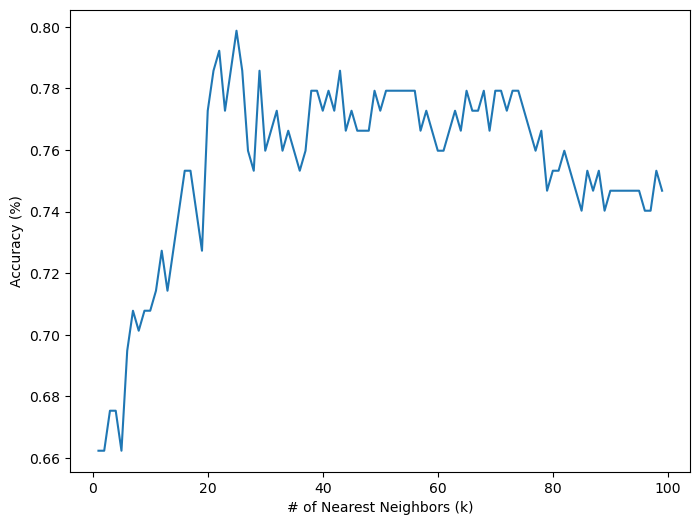

In [41]:
accuracies = []

for k in range(1,100):
    y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k, p=1)
    accuracies.append(accuracy_score(y_test, y_hat_test))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)')


In [24]:
y_test.head()

668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64

In [25]:
print(y_test)

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64
